In [1]:
#Importacion de librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
sns.set_style('darkgrid')

In [3]:
#Cargar Los datos y desplegar los 5 primeros registros
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#La columna passengerid podria considerarse como el indice del dataset, por ende este puede ser eliminado ya que no aporta informacion relevante a la tarea de prediccion
titanic_df.drop(['PassengerId'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Observamos cuantas muestras tenemos en el dataset
titanic_df.shape

(891, 11)

In [6]:
#Miramos el tipo de dato por columna y la cantidad no nula de valores que estas tienen
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [7]:
titanic_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

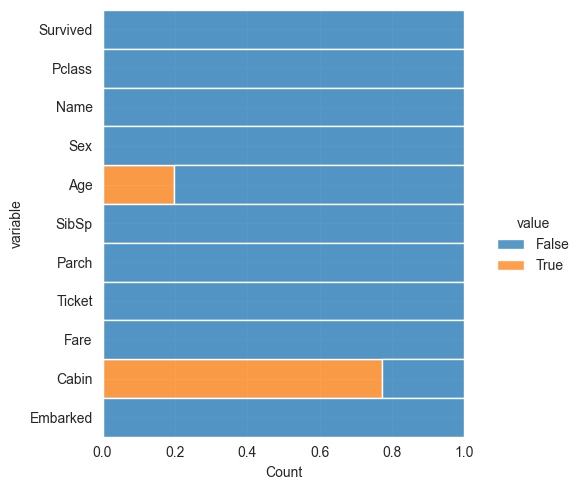

In [8]:
#Verificamos la proporcion de valores nulos  existentes en cada variable
titanic_df.isnull().melt().pipe(
    lambda df: (
        sns.displot(
            data=df,
            y='variable',
            hue='value',
            multiple='fill'
        )
    )
)

In [9]:
#Procedemos a eliminar la columna cabin debido a que mas del 70% de sus datos son nulos
titanic_df.drop(['Cabin'], axis=1, inplace=True)

In [10]:
#Reemplazamos los datos nulos de la columna embarked por la moda de esta columna
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [11]:
#Reemplazamos los datos nulos de la columna Age por la edad media pero esta dependiendo del sexo
mean_mujer, mean_hombre = titanic_df.groupby('Sex')['Age'].mean().values

In [12]:
def fill_Age(data):
    age = data[0]
    sex = data[1]
    
    if pd.isnull(age):
        if sex == 'male':
            return 30.72664459161148
        else:
            return 27.915708812260537
    else:
        return age

In [13]:
titanic_df['Age'] = titanic_df[['Age', 'Sex']].apply(fill_Age, axis=1)

In [14]:
titanic_df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

#### Vemos que la columna Cabin tiene mas de 600 datos faltantes y la columna edad tiene mas de 100 datos faltantes, ademas que existen 6 variables numericas y 5 categoricas

In [15]:
#Miramos los estadisticos basicos de las variables numericas
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.736034,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.014897,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#Y los estadisticos de las variables categoricas
titanic_df.describe(include=object)

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,646


In [17]:
#Eliminamos registros duplicados y verificamos cuando fueron eliminados
titanic_df.drop_duplicates()
titanic_df.shape

(891, 10)

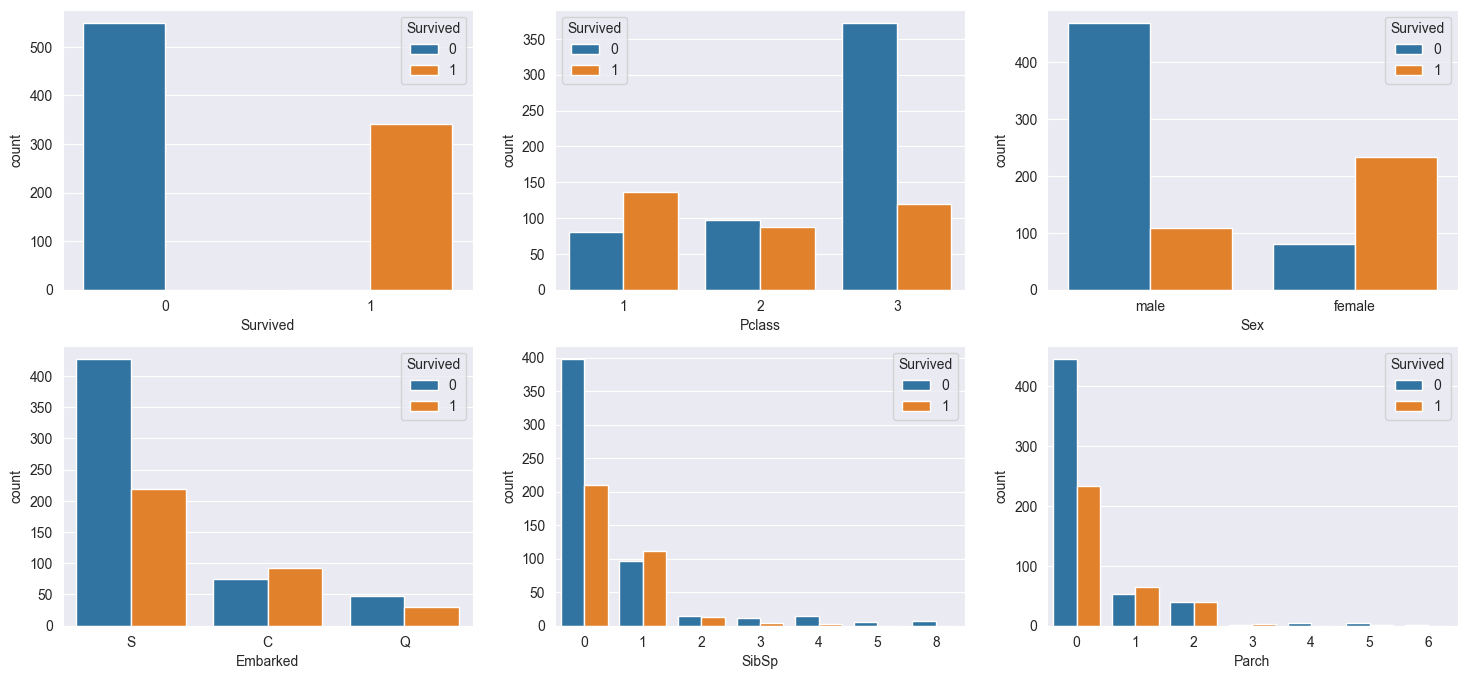

In [18]:
#Se procede a visualizar el conteo de datos de algunas columnas
cols = ['Survived', 'Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
fig, ax = plt.subplots(2,3, figsize=(18,8))
ax = ax.flatten()

for i, col in enumerate(cols):
    sns.countplot(data=titanic_df, x=col, ax=ax[i], hue='Survived')

<Axes: xlabel='Age', ylabel='Count'>

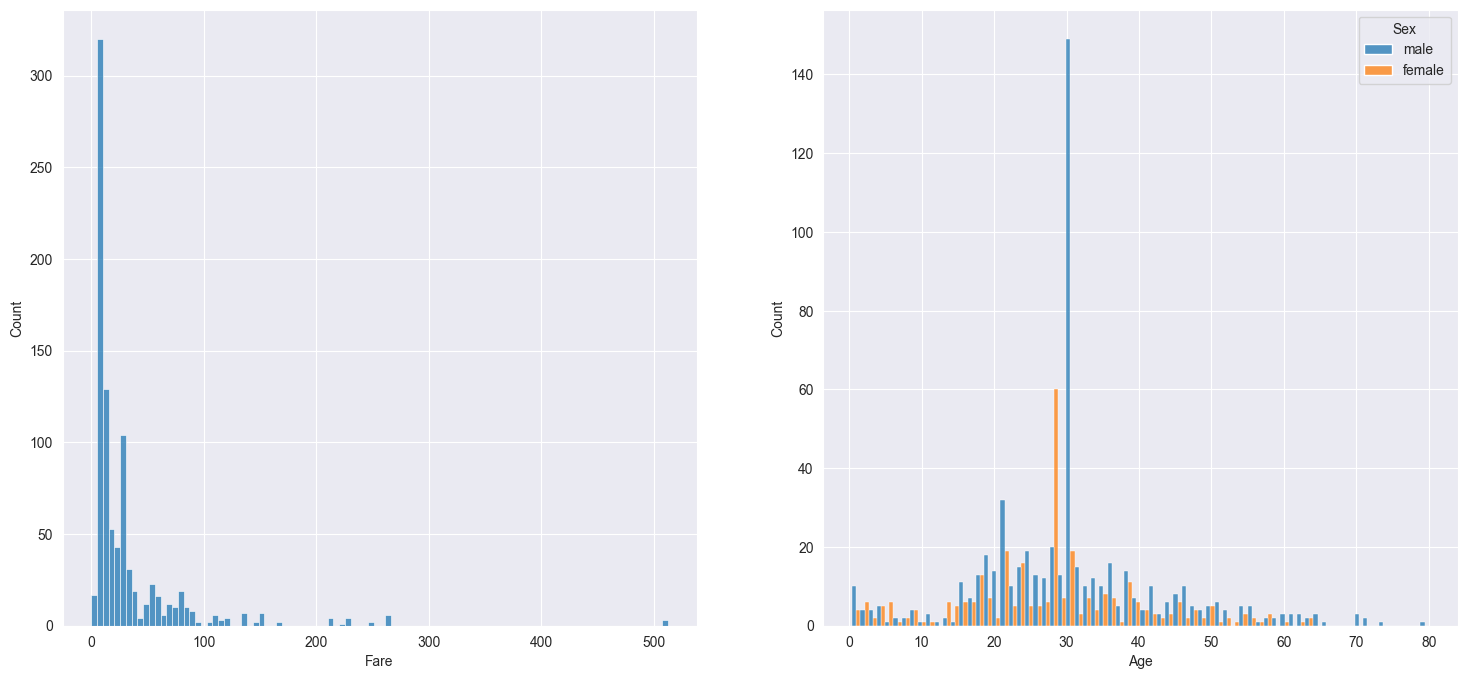

In [19]:
#Y el histograma de las variables restantes para observar la distribucion
fig, ax = plt.subplots(1,2, figsize=(18,8))
sns.histplot(data=titanic_df, x='Fare', bins=100, ax=ax[0])
sns.histplot(data=titanic_df, x='Age', bins=70, ax=ax[1], hue='Sex', multiple='dodge')

In [20]:
#Observemos la cantidad de registros que hay en la columna fare a partir del valor 200
titanic_df[['Fare']].query('Fare > 200').count()

Fare    20
dtype: int64

In [21]:
#Miremos que cantidad de esos 20 'Outliers' son sobrevivientes
titanic_df.query('Fare > 200')['Survived'].value_counts()

1    14
0     6
Name: Survived, dtype: int64

<Axes: >

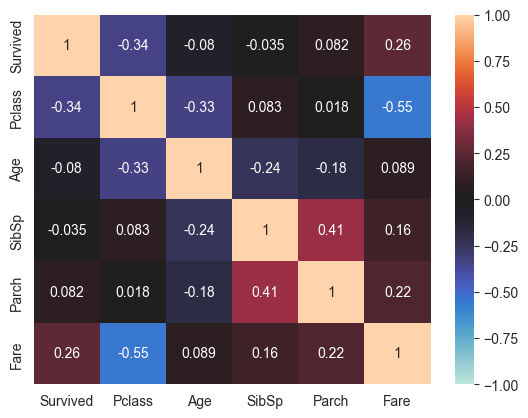

In [22]:
#Verificar correlaciones. Al ser un problema de clasificacion no tiene mucho sentido observar correlaciones existentes ya que la variable objetivo es binaria 

sns.heatmap(
    data=titanic_df.corr(numeric_only=True),
    center=0,
    vmin=-1,
    vmax=1,
    annot=True
)

<Axes: xlabel='Age', ylabel='Count'>

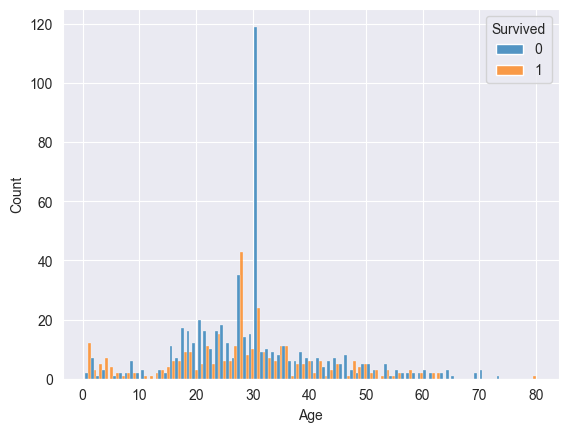

In [23]:
sns.histplot(data=titanic_df, x='Age', hue='Survived', bins=80, multiple='dodge')

In [24]:
#Observar valores unicos que tiene la columna Embarked
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [25]:
#Reemplazamos las variables categoricas por su codificacion en numero
"""
#Esta es una forma de hacerlo

titanic_df = (
    titanic_df.assign(
        Sex = lambda df: (
            df.Sex.replace(['male', 'female'], [0, 1])
        )
    )
)
"""
titanic_df.replace(
    {'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, 
    inplace=True
)


In [26]:
#Volvemos a desplegar los primeros 5 registros del dataset para ver como quedo
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [27]:
#Consideramos la que columna Name y Ticket no aportan a la probabilidad de supervivencia del tripulante por ende tambien las eliminamos
titanic_df.drop(['Ticket', 'Name'], axis=1, inplace=True)

In [28]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [29]:
X = titanic_df.drop(['Survived'], axis=1)
Y = titanic_df['Survived']

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [31]:
model = LogisticRegression(random_state=0)

In [32]:
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [33]:
Y_train_prediction = model.predict(X_train)

In [34]:
train_accuracy = accuracy_score(Y_train, Y_train_prediction)
train_accuracy

0.8103932584269663

In [35]:
Y_test_prediction = model.predict(X_test)

In [36]:
test_accuracy = accuracy_score(Y_test, Y_test_prediction)
test_accuracy

0.8212290502793296

<Axes: >

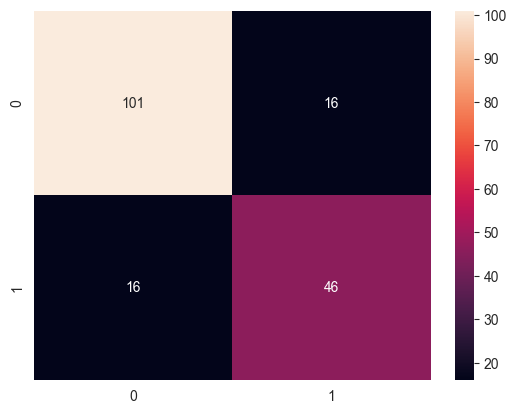

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_test_prediction)
sns.heatmap(cm, annot=True, fmt='d')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_prediction))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       117
           1       0.74      0.74      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

